# UV TRNU.CSN - Data and Machine Learning
## Unsupervised learning - TP PCA - 2025

Christelle Garnier

### Aim of the TP

The aim of this practical work is:
- to apply PCA (Principal Component Analysis) to real datasets by leveraging the classes and functions provided by the `Scikit-Learn` library. 
- to create graphical representations of both the observations and the variables using the `matplotlib` library to interpret the PCA results. 

### Dataset 'temperatures.csv'

The work consists of performing a standardized PCA on the data contained in the file 'temperatures.csv' available on MyLearningSpace. 

Start by looking at the file. It contains data concerning about thirty European cities:
- Meteorological data : average temperatures for each month of the year, mean and range of annual temperatures
- Geographical data: latitude, longitude

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#TODO ADD other needed libraries

### 1. Reading the Data

1. Load the file 'temperatures.csv' using `read_csv()` from the `pandas` library. Check the import by using the methods and attributes available for the `DataFrame` class, such as `info()`, `describe()`, `shape`, and `head()`.

1. Store the first column separately, as you will need to label the "observations" in graphical representations of the principal components.

1. Decide which variables to keep for PCA calculation and remove the unused columns with the `drop()` method of the `DataFrame` class.

1. Save the names of the selected columns using the `columns` attribute of the `DataFrame` class, as you will need to label the "variables" in the correlation circle. 

In [23]:
path = 'temperatures.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude,Region
0,Amsterdam,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5,Ouest
1,Athenes,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5,Sud
2,Berlin,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2,Ouest
3,Bruxelles,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2,Ouest
4,Budapest,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0,Est


In [13]:
first_column = data.iloc[:, 0]
# print(first_column)

In [24]:
data = data.drop(columns=['Unnamed: 0', 'Region'])
data.head()

,Janvier,Fevrier,Mars,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,Moyenne,Amplitude,Latitude,Longitude
0,2.9,2.5,5.7,8.2,12.5,14.8,17.1,17.1,14.5,11.4,7.0,4.4,9.9,14.6,52.2,4.5
1,9.1,9.7,11.7,15.4,20.1,24.5,27.4,27.2,23.8,19.2,14.6,11.0,17.8,18.3,37.6,23.5
2,-0.2,0.1,4.4,8.2,13.8,16.0,18.3,18.0,14.4,10.0,4.2,1.2,9.1,18.5,52.3,13.2
3,3.3,3.3,6.7,8.9,12.8,15.6,17.8,17.8,15.0,11.1,6.7,4.4,10.3,14.4,50.5,4.2
4,-1.1,0.8,5.5,11.6,17.0,20.2,22.0,21.3,16.9,11.3,5.1,0.7,10.9,23.1,47.3,19.0


In [26]:
data_columns = data.columns
print(data_columns)

Index(['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout',
       'Septembre', 'Octobre', 'Novembre', 'Decembre', 'Moyenne', 'Amplitude',
       'Latitude', 'Longitude'],
      dtype='object')


### 2. Exploring the Data

Once the data for the PCA has been imported and selected, begin with a preliminary analysis to identify relationships between the variables.

1. Compute the correlation coefficients between all pairs of numerical variables using the `corr()` method of the `DataFrame` class and visualize the correlation matrix as a heatmap using the `heatmap()` function from the `seaborn` library. 

1. In addition, you can also display scatter plots for all pairs of numerical variables using the `scatter_matrix()` function from `pandas.plotting`.

1. Identify which variables are the most strongly correlated (positively and negatively), and which ones show the weakest correlations.

Text(0.5, 1.0, 'Correlation Matrix of Temperature Data')

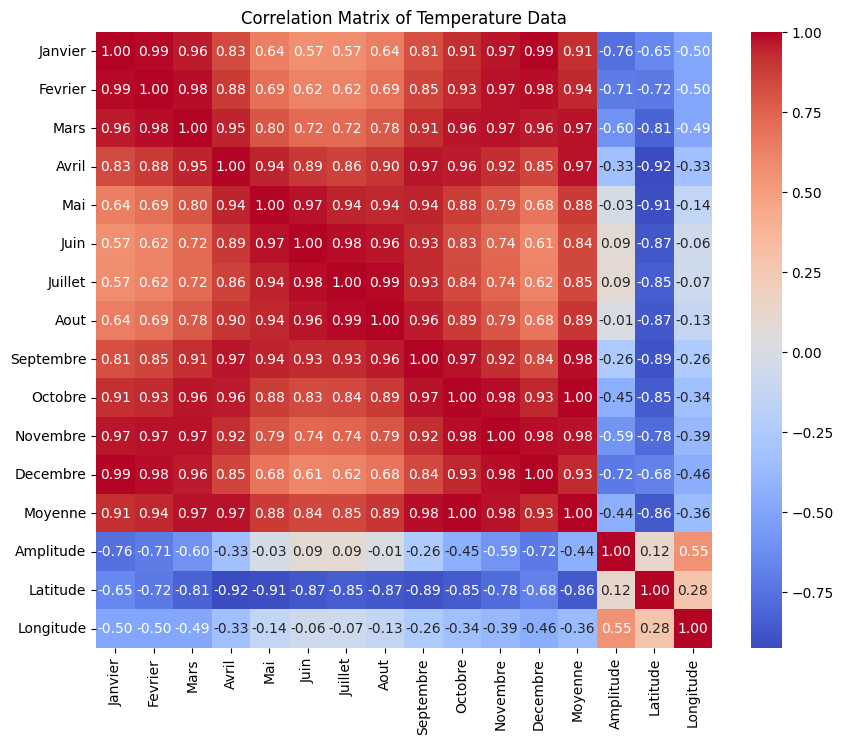

In [33]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Temperature Data')

Text(0.5, 0.98, 'Scatter Matrix of Temperature Data')

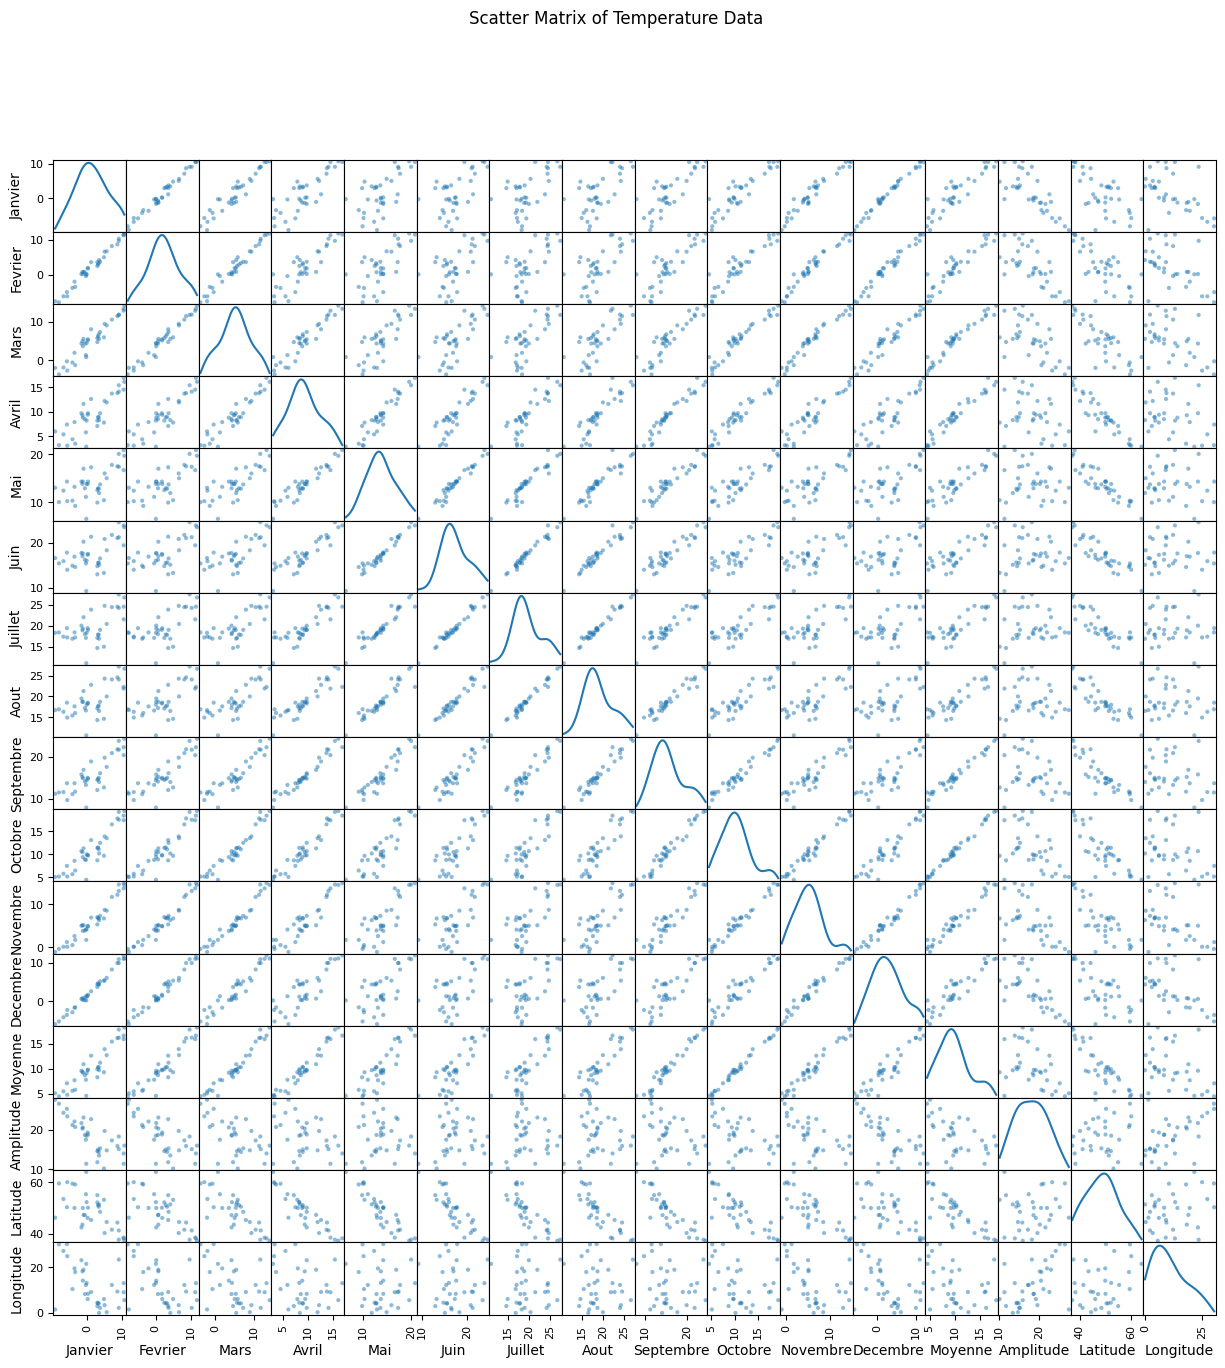

In [ ]:
scatter_matrix = pd.plotting.scatter_matrix(data, figsize=(15, 15), diagonal='kde', alpha=0.5)
plt.suptitle('Scatter Matrix of Temperature Data')

# 3. The latitude has a negative correlation with the temperature
#  You can see like a correlation between latitude and temperature. The higher the latitude, the lower the temperature.

### 3. Preprocessing the Data
To apply a standardized PCA, the data must be centered and scaled. There are several ways to do this, but the simplest approach is as follows:

1. First, convert the `DataFrame` object into a `numpy` array, denoted as $\mathbf{X}$ (following the course notation), by using the `to_numpy()` method of the `DataFrame` class.

1. Next, use the `StandardScaler` class from `sklearn.preprocessing` to center and scale the data. Review this class, paying particular attention to the `fit()` and `transform()` methods, and then use them to obtain the normalized data matrix $\mathbf{Z}$ (again following the course notation).

1. Finally, verify that the mean and variance of the standardized variables are indeed 0 and 1, respectively.



### 4. Performing the PCA

Once the data has been standardized, you can carry out the Principal Component Analysis.

1. Study the `PCA` class from `sklearn.decomposition`. Review the main attributes and methods of this class, especially `fit()`, `transform()`, `explained_variance_`, `explained_variance_ratio_`, and `components_`.

2. Apply the PCA method to the standardized data $\mathbf{Z}$ in order to compute all the eigenvalues and the principal vectors (eigenvectors). Check the sum of the eigenvalues, if necessary normalize the eigenvalues to obtain a sum equal to the number of variables.   

3. Display the explained inertia (variance) per axis, the explained inertia ratio per axis and the cumulative explained inertia ratio using the `cumsum()` function from `numpy`.  

4. Plot the scree plot (eigenvalue decay) and the cumulative explained inertia ratio curve using the `bar()` and `plot()` functions from `matplotlib.pyplot`.

5. Determine the number of axes to retain using the three criteria discussed in the course. 

6. Precise the overall quality of the representation with the retained number of axes.



### 5. Projection of Observations

The objective is to project the observations onto the principal axes. 

1. Apply the PCA method to the standardized data $\mathbf{Z}$ using the retained number of components.

1. Which formula from the course gives the coordinates of the observations in the considered subspace ?

1. Use the `transform()` method of the `PCA` class to obtain the principal components. 

1. Represent the observations on the first principal plane spanned by the first 2 principal vectors (axes 0 and 1) using the `scatter()` function from `matplotlib.pyplot`. Label each point with the `text()` function from `matplotlib.pyplot`. Depending on the number of retained axes, you can also plot the second principal plane defined by axes 2 and 3.

1. Compute the contribution of the observations to the inertia explained by each axis. Using these values and the graphical representations, identify the observations that contribute the most to each axis (both positively and negatively).

1. Highlight similarities and differences between the observations.

### 6. Projection of Variables (Correlation Circle)

The objective is now to project the variables inside the correlation circle onto the factorial axes. 

1. Which formula from the course gives the coordinates of the variables in the considered subspace ?

1. Use the attribute `components_` of the `PCA` class to obtain the eigenvectors (or principal vectors) corresponding to the eigenvalues. Deduce the correlations between the original variables and the first principal factors.

1. Represent the projected variables on the relevant factorial plane(s) with line segments or arrows starting from the origin. Label each point and draw the correlation circle with the `Circle()` function from `matplotlib.pyplot`.

1. Find the strongly correlated variables (positively or negatively) and the weakly correlated variables. 

1. Determine which variables contribute most to each principal component (both positively and negatively) and provide an interpretation of the different axes. 

1. By combining the two projections (variables and observations), summarize the main insights provided by the PCA including: 
- interpretation of each axis (meaning of new variables), 
- groups of observations sharing similar characteristics.


### 7. Extension to Other Data

Extend this work by performing a standardized PCA on other datasets contained in the files 'decathlon_JO.txt' and 'activites.txt' available on MyLearningSpace.  

#### Dataset 'decathlon_JO.txt'

This dataset summarizes the performance of athletes at different athletics disciplines during the Olympic Games of Athens in 2004. 

In this file, the first column contains the names of the athletes. 

The following columns correspond to the variables including: 
- 10 quantitative variables: performances (100m, Long Jump, Shot Put, High Jump, 400m, 110m hurdles, Discus, Pole Vault, Javelin, 1500m)
- 1 ordinal variable: ranking
- 1 discrete variable: scored points
- 1 qualitative variable: Olympic Games (Athens 2004)


#### Dataset 'activites.txt'

This dataset corresponds to a (slightly old) survey conducted on different populations about the time spent on various daily activities.

In this file, the first column POP identifies groups of people. The codes used are as follows:
H: Men, F: Women, A: Active, N: Non-active, M: Married, C: Single, U: USA, W: Western countries, E: Eastern countries, Y: Yugoslavia.

The following columns correspond to the variables including:
- 10 numerical variables which represent the time spent (in hundredths of an hour) on: PROFession, TRANsport, MENAge (housework), ENFAnts (children), COURses (shopping), TOILette (personal care), REPas (meals), SOMMeil (sleep), TELEvision, and LOISirs (leisure).
- 4 categorical variables:
SEXe (1 = Men, 2 = Women), 
ACTivité (1 = Active, 2 = Non-active, 9 = Not specified), 
état CIVil (1 = Single, 2 = Married, 9 = Not specified), 
PAYs (1 = USA, 2 = Western countries, 3 = Eastern countries, 4 = Yugoslavia).

The times are expressed in hundredths of an hour. For example, the top-left cell (610) indicates that active men in the USA spend on average 6 hours and 6 minutes (10/100 of an hour) on their professional activity. The total over the 10 activities is 2400 (24 hours).

